Modeling scores using regression analysis is the objective for this project. The dataset used contains information about NFL games since 1920, including information about the teams that played and how many points each team scored in their games. Linear regression and polynomial regression were utilized here.

The imports used for this project are as follows:

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

The first step is to load the CSV file into a panda data frame, done with the following statement. It is previewed to ensure that the correct data is being used.

In [98]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/nfl-elo-game/master/data/nfl_games.csv')
df.head()

,date,season,neutral,playoff,team1,team2,elo1,elo2,elo_prob1,score1,score2,result1
0,1920-09-26,1920,0,0,RII,STP,1503.947,1300.000,0.824651,48,0,1.0
1,1920-10-03,1920,0,0,AKR,WHE,1503.420,1300.000,0.824212,43,0,1.0
2,1920-10-03,1920,0,0,RCH,ABU,1503.420,1300.000,0.824212,10,0,1.0
3,1920-10-03,1920,0,0,DAY,COL,1493.002,1504.908,0.575819,14,0,1.0
4,1920-10-03,1920,0,0,RII,MUN,1516.108,1478.004,0.644171,45,0,1.0


Next, the teams are extracted from the dataframe. This is necessary because the scores for the team in question are going to be stored for future use. A set is used to ensure that each team is present exactly once.

In [99]:
array = df.values
teams = set(np.append(array[:, 4], array[:, 5]))

The next step is to create a dictionary, with the keys being the teams and the values being their scores. Of course, this is not exactly space efficient, but this was a useful step when testing the models.

In [134]:
scores = {}
for team in teams:
    arr = [x[9] for x in array if x[4] == team]
    arr += [x[10] for x in array if x[5] == team]
    scores[team] = arr
print(scores['CHI'])

[20, 25, 28, 0, 14, 16, 7, 20, 3, 22, 6, 20, 10, 10, 0, 7, 7, 6, 9, 33, 3, 20, 22, 0, 18, 26, 20, 7, 14, 3, 0, 29, 10, 6, 33, 3, 12, 3, 3, 31, 28, 7, 6, 19, 14, 21, 0, 14, 14, 7, 24, 17, 34, 10, 10, 19, 0, 35, 6, 12, 14, 14, 0, 30, 14, 0, 0, 9, 27, 13, 6, 0, 27, 27, 13, 34, 28, 0, 0, 0, 27, 14, 0, 7, 6, 0, 0, 9, 0, 0, 13, 20, 12, 13, 6, 14, 21, 21, 6, 26, 12, 2, 9, 18, 7, 6, 0, 27, 13, 20, 34, 6, 9, 9, 7, 12, 10, 14, 17, 7, 23, 41, 27, 27, 17, 10, 24, 14, 0, 20, 7, 7, 26, 12, 10, 16, 28, 14, 29, 15, 21, 16, 21, 7, 17, 31, 30, 44, 0, 30, 27, 7, 16, 14, 47, 31, 53, 49, 34, 14, 31, 35, 33, 37, 41, 26, 45, 16, 38, 47, 20, 48, 33, 35, 21, 41, 34, 21, 28, 21, 21, 7, 21, 28, 28, 28, 28, 21, 10, 24, 42, 28, 40, 33, 20, 49, 14, 21, 42, 28, 35, 7, 48, 21, 16, 38, 24, 27, 30, 52, 27, 28, 28, 17, 24, 6, 24, 13, 28, 24, 17, 14, 38, 16, 28, 24, 24, 10, 14, 28, 21, 16, 24, 17, 28, 24, 28, 10, 24, 28, 19, 38, 52, 24, 21, 17, 31, 58, 38, 30, 10, 38, 17, 34, 21, 14, 3, 13, 28, 31, 24, 0, 30, 21, 21, 7, 

A scatter plot of the scores over each of the games played gives a decent visualization of the data being worked with.

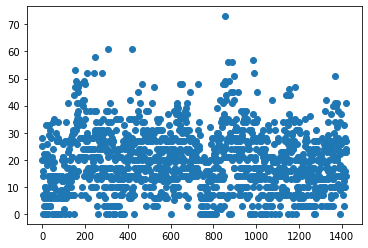

In [135]:
y = scores['CHI']
X = [i for i in range(len(y))]
plt.scatter(X, y)

Next is to produce training data to train the Linear Regression model on. This is done by using sklearn's train_test_split feature, which will produce this data. The test_size parameter is set to .2, meaning that 80% of the scores available will be used for training the model.

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=5)
X_train = np.array(X_train).reshape(-1, 1)

Then the model is created and trained, and a test value is given for the model to predict the result of. The test value used here is the number of scores plus one to predict the next score. Otherwise, to predict the nth score, a value of n can be used in place of len(y) + 1.

In [136]:
model = LinearRegression()
model.fit(X_train, y_train)
test = np.array([len(y) + 1])
prediction = model.predict(test.reshape(-1, 1))
print(np.round(prediction))

[16.]


This shows that using a linear regression model, 16 can be predicted for the Chicago Bears football team as the number of points that they will score in the next football game that they play.

But what about using other regression models, such as quadratic regression or, more generally, polynomial regression? While this cannot be directly modeled using scikit, a curve polynomial in nature to fit data on can be modeled instead. This utilizes scikit's PolynomialFeatures tool. To create a quadratic curve to fit the data on, a value of 2 is given as an argument to the degree parameter. A little bit of extra engineering is needed for this to work correctly.

In [137]:
d = 2
pf = PolynomialFeatures(degree=d)
X_poly = pf.fit_transform(X_train)
test = np.array([len(y) + 1] * (d + 1)).reshape(1, -1)
model = LinearRegression()
model.fit(X_poly, y_train)
prediction = model.predict(test)
print(np.round(prediction))

[14.]


Using a quadratic curve to perform regression on indicates that the Chicago Bears might score around 14 points in their next football game.

As a test, a curve of degree 6 was attempted as well, with the corresponding result below. This is notably higher than the previous two and may reflect the nature of higher degree polynomial curves.

In [138]:
d = 6
pf = PolynomialFeatures(degree=d)
X_poly = pf.fit_transform(X_train)
test = np.array([len(y) + 1] * (d + 1)).reshape(1, -1)
model = LinearRegression()
model.fit(X_poly, y_train)
prediction = model.predict(test)
print(np.round(prediction))

[26.]
